# 베이스라인 코드 해설

## Fixed Random Seed
seed 값에 의해 동일한 코드를 사용해도 결과가 다를 수 있기에, 동일한 결과를 위해 seed 값을 고정시킵니다

In [1]:
import random
import numpy as np
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_number = 42
seed_everything(seed_number)

## 데이터 불러오기 및 확인
train.csv, test.csv 파일을 로드하여 상위행을 출력해 봅시다

In [2]:
import pandas as pd

train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

display(train.head(3))
display(test.head(3))

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0


,ID,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TEST_00000,남성,0,0,2,37170000.0,근로자,대학교 중퇴,기혼,주택 / 아파트,0.006296,1,1,0,핵심 노동자,4.0,기타 0,27,2,8.0
1,TEST_00001,남성,0,0,0,47790000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,0.004960,1,1,0,관리직,2.0,정부,40,8,11.0
2,TEST_00002,남성,1,1,1,37170000.0,공무원,고등학교 졸업,기혼,주택 / 아파트,0.026392,1,1,0,관리직,3.0,국가 안보,43,15,14.0


## EDA : TARGET 확인하기
예측 대상이 되는 TARGET이 어떤 값들로 구성되어 있는지 확인해 봅시다  

findfont: Font family ['MaruBuri'] not found. Falling back to DejaVu Sans.
findfont: Font family 'MaruBuri' not found.
findfont: Font family 'MaruBuri' not found.
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing fr

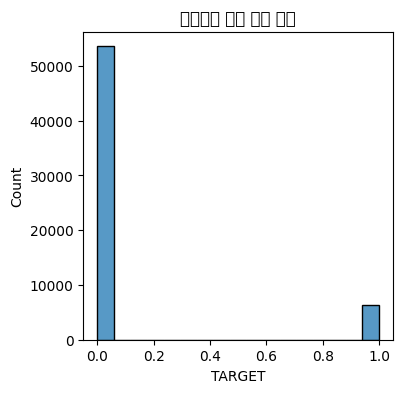

In [3]:
# 시각화 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정하기
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

plt.subplots(figsize = (4,4)) # 그림 크기 설정

sns.histplot(train, x='TARGET')
plt.title('신용카드 연체 여부 비율')
plt.show()

## 데이터 전처리 1 : Feature와 Label 설정
모델에게 입력할 feature인 x와 label인 y를 구분해 봅시다  

In [4]:
train_x = train.drop(columns=['ID', 'TARGET']) 
train_y = train['TARGET']

test_x = test.drop(columns=['ID'])

## 데이터 전처리 2 : 범주형 변수 수치화 
LabelEncoder를 통해 범주형 변수 수치화를 진행해 봅시다  

In [5]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군']

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x[i]) 
    train_x[i]=le.transform(train_x[i])
    
    for case in np.unique(test_x[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case) 
    test_x[i]=le.transform(test_x[i])
    
display(train_x.head(3))
display(test_x.head(3))

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,2,1,1,2,18054000.0,5,0,0,3,0.004960,1,0,0,1,4.0,6,39,1000,23.0
1,1,1,0,0,59472000.0,1,1,0,3,0.018029,1,1,0,4,2.0,24,45,4,16.0
2,2,0,1,0,29736000.0,1,0,0,3,0.010500,1,1,0,5,2.0,23,32,3,9.0


,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,1,0,0,2,37170000.0,1,2,0,3,0.006296,1,1,0,17,4.0,5,27,2,8.0
1,1,0,0,0,47790000.0,1,1,0,3,0.004960,1,1,0,3,2.0,49,40,8,11.0
2,1,1,1,1,37170000.0,0,0,0,3,0.026392,1,1,0,3,3.0,3,43,15,14.0


## 오버샘플링 1 : RandomOverSampler
RandomOverSampler를 통해 Random 오버샘플링을 진행해 봅시다 

In [6]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=seed_number)
train_x_oversampled, train_y_oversampled = oversampler.fit_resample(train_x, train_y)

## 오버샘플링 2 : 결과 확인
오버샘플링의 결과를 확인해 봅시다  

findfont: Font family 'MaruBuri' not found.
findfont: Font family 'MaruBuri' not found.
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\A

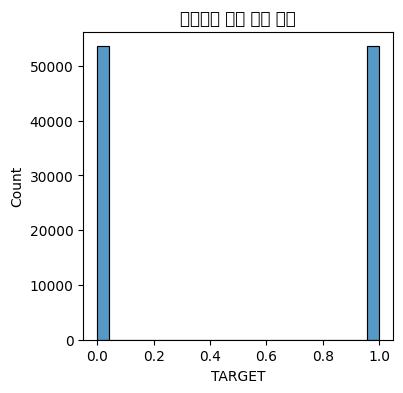

In [7]:
plt.subplots(figsize = (4,4))

sns.histplot(train_y_oversampled)
plt.title('신용카드 연체 여부 비율')
plt.show()

## 모델 선정 및 학습  
신용카드 연체 탐지를 위한 AI 모델을 정하고 학습시켜 봅시다  

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=seed_number)
model.fit(train_x_oversampled, train_y_oversampled)

RandomForestClassifier(random_state=42)

## 예측 수행
.predict_proba()를 통해 모델의 예측한 신용카드 연체 확률을 구해봅시다 

In [9]:
pred_probability = model.predict_proba(test_x)

display(model.classes_)
display(pred_probability)

array([0, 1], dtype=int64)

array([[0.78, 0.22],
       [0.93, 0.07],
       [0.98, 0.02],
       ...,
       [0.85, 0.15],
       [0.96, 0.04],
       [0.9 , 0.1 ]])

## 제출양식에 예측결과 입력
모델이 예측한 신용카드 연체 확률을 제출양식에 입력해 봅시다  

In [10]:
sample_submission = pd.read_csv('sample_submission.csv')

baseline_submission = sample_submission.copy()
baseline_submission['TARGET'] = pred_probability[:,1]
baseline_submission

,ID,TARGET
0,TEST_00000,0.22
1,TEST_00001,0.07
2,TEST_00002,0.02
3,TEST_00003,0.08
4,TEST_00004,0.34
...,...,...
39995,TEST_39995,0.03
39996,TEST_39996,0.12
39997,TEST_39997,0.15
39998,TEST_39998,0.04


## 예측결과 저장
값이 기입된 제출물을 저장해 봅시다  

In [11]:
baseline_submission.to_csv('baseline_submission.csv', index=False)